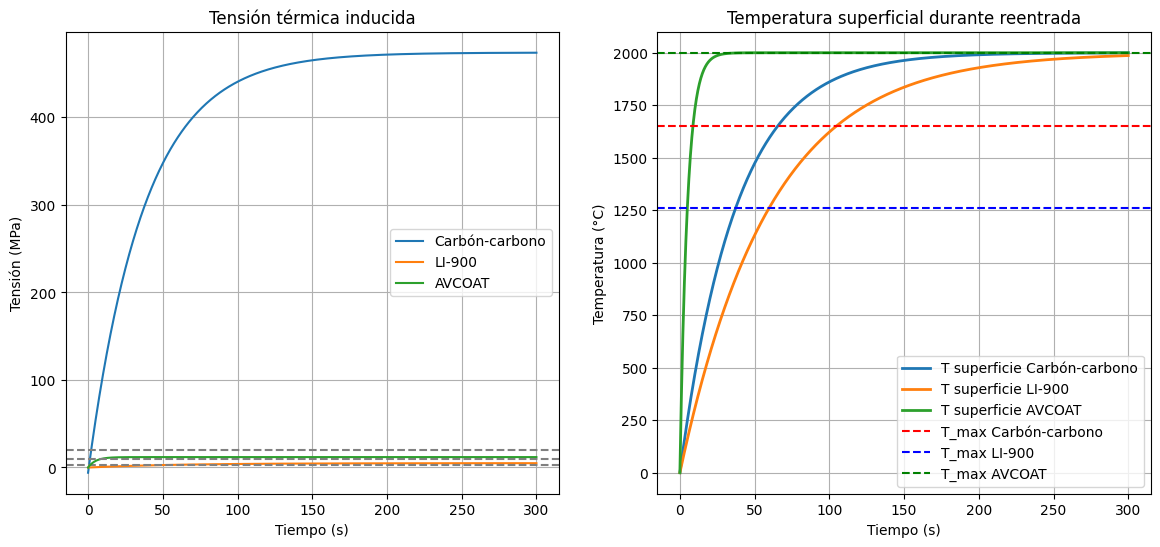

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Diccionario con propiedades para cada material
materiales = {
    "Carbón-carbono": {
        "E": 60e9,
        "alpha": 4e-6,
        "T_max": 1650,
        "sigma_max": 20e6
    },
    "LI-900": {
        "E": 1e9,
        "alpha": 2.5e-6,
        "T_max": 1260,
        "sigma_max": 3e6
    },
    "AVCOAT": {
        "E": 0.2e9,
        "alpha": 3e-5,
        "T_max": 2000,
        "sigma_max": 10e6
    }
}

# Tiempo simulado (0 a 300 segundos)
tiempo = np.linspace(0, 300, 600)

# Perfil de temperatura superficial simulado (calentamiento por fricción)
# Temperatura superficial variable según material
T_superficie = {}
for nombre, props in materiales.items():
    # Factor de aislamiento inversamente proporcional a la expansión térmica
    # Cuanto menor alpha, mayor aislamiento → sube más lento la temperatura
    factor = 1 / props["alpha"]
    escala = factor / max(1 / props["alpha"] for props in materiales.values())  # normaliza
    tau = 60 * escala  # constante de tiempo ajustada
    T_superficie[nombre] = 2000 * (1 - np.exp(-tiempo / tau))

T_interior = 25  # °C (constante)




# Inicializar gráficos
plt.figure(figsize=(14, 6))

# Gráfica de tensiones
plt.subplot(1, 2, 1)
for nombre, props in materiales.items():
    sigma = props["E"] * props["alpha"] * (T_superficie[nombre] - T_interior)
    plt.plot(tiempo, sigma / 1e6, label=nombre)  # convertir a MPa
    plt.axhline(props["sigma_max"] / 1e6, color='gray', linestyle='--')

plt.title("Tensión térmica inducida")
plt.xlabel("Tiempo (s)")
plt.ylabel("Tensión (MPa)")
plt.grid()
plt.legend()

# Gráfica de temperatura
# Gráfica de temperatura con líneas punteadas de diferentes colores
plt.subplot(1, 2, 2)
for nombre, T in T_superficie.items():
    plt.plot(tiempo, T, label=f"T superficie {nombre}", linewidth=2)


# Colores personalizados para cada material
colores = {
    "Carbón-carbono": "red",
    "LI-900": "blue",
    "AVCOAT": "green"
}

for nombre, props in materiales.items():
    plt.axhline(y=props["T_max"], linestyle='--', color=colores[nombre],
                label=f"T_max {nombre}")

plt.title("Temperatura superficial durante reentrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.legend()


In [9]:
print("📋 Resultados de fallo por material con temperatura específica:\n")

for nombre, props in materiales.items():
    # Usar la temperatura superficial específica de este material
    T_mat = T_superficie[nombre]
    delta_T = T_mat - T_interior

    # Cálculo de tensión térmica
    sigma = props["E"] * props["alpha"] * delta_T

    # Criterios de fallo
    fallo_temp = T_mat >= props["T_max"]
    fallo_mec = sigma >= props["sigma_max"]
    fallo_total = fallo_temp | fallo_mec

    # Reportar fallo
    if np.any(fallo_total):
        t_fallo = tiempo[fallo_total][0]
        causas = []
        if fallo_temp[fallo_total][0]:
            causas.append("Térmico (T > T_max)")
        if fallo_mec[fallo_total][0]:
            causas.append("Mecánico (σ > σ_max)")

        print(f"⚠️ {nombre}: Falla a los {t_fallo:.1f} s por {' y '.join(causas)}")
    else:
        print(f"✅ {nombre}: No falla durante la reentrada (0–300 s)")




📋 Resultados de fallo por material con temperatura específica:

⚠️ Carbón-carbono: Falla a los 2.5 s por Mecánico (σ > σ_max)
⚠️ LI-900: Falla a los 57.1 s por Mecánico (σ > σ_max)
⚠️ AVCOAT: Falla a los 9.5 s por Mecánico (σ > σ_max)
